# FaceCheck: AI Detection 

## Overview

In today's digital world, anyone can manipulate images and videos with relative ease. Distinguishing real faces from AI-generated ones has become increasingly crucial. 


FaceCheck is a AI image classifier that is trained on 1000 fake and real images to discern genuine faces from a synthetic one. 

## Business Problem

There is a variety of problems that comes with facial image fabrication.

- Misinformation: Deepfakes can be used to fabricate news or spread fake news for political gain
- Financial fraud: Fake identities can be used to commit identity theft, open fraudulent accounts, and bypass security measures.
- Manipulation: Fake identities can be used to impersonal individuals and deceive audiences

FaceCheck equips individuals with the ability to detect and verify faces. FaceCheck will allow users to:

- Verify the authenticity of online profiles and interactions.
- Protect themselves from online scams and phishing attempts.
- Contribute to a safer and reliable online experience

## Data Understanding

The dataset comes from https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection/ .

In [24]:
## Imports
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras import models
from keras import layers
from keras import optimizers

import random
import PIL
import pickle 
import cv2

In [17]:
os.listdir('data/')

['training_fake', 'training_real']

In [56]:
#Directory Path
real = "data/training_real/"
fake = "data/training_fake/"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [57]:
categories = ['Real', 'AIGenerated']

### Visualizing Our Data

In [32]:
## function for loading image
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]

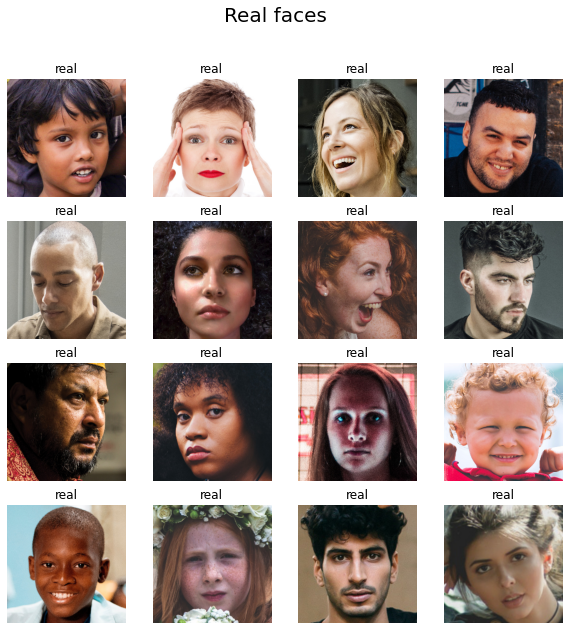

In [48]:
fig = plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real + real_path[i]), cmap='gray')
    plt.suptitle("Real faces",fontsize=20)
    plt.title('real')
    plt.axis('off')

plt.show()

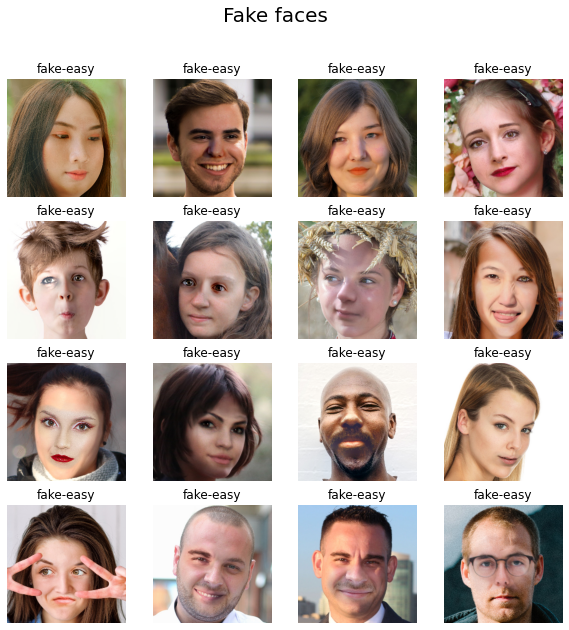

In [49]:
fig = plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake + fake_path[i]), cmap='gray')
    plt.suptitle("Fake faces",fontsize=20)
    plt.title('fake-'+ fake_path[i][:4])
    plt.axis('off')

plt.show()

In [65]:
dataset_path = "../AI-Facial-Detection/data/"

In [66]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                  validation_split=0.2)

In [67]:
train_generator = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="training")

Found 1633 images belonging to 2 classes.


In [68]:
val_generator = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 408 images belonging to 2 classes.


In [83]:
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)

1.0


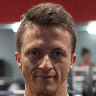

In [82]:
# Preview images
print(train_labels[5])
array_to_img(train_images[5])

0.0


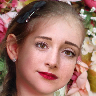

In [91]:
print(val_labels[5])
array_to_img(val_images[5])

# Modeling

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

### Baseline model: Logistic Regression Neural Net


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Flatten the 2D image
    tf.keras.layers.Dense(128, activation='relu'),  # Dense layer with 128 neurons
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])

# Compile the model with an optimizer and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

In [ ]:
# Define a function that returns a baseline compiled Keras model 
def create_baseline_model():
    
    # Initialize model
    model = models.Sequential()

    # First hidden layer
    model.add(layers.Dense(10, activation='relu', input_shape=(n_features,)))

    # Second hidden layer
    model.add(layers.Dense(5, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='SGD', 
                  loss='mse',  
                  metrics=['mse']) 
    
    # Return the compiled model
    return model

In [92]:
model_1 = Sequential()

In [ ]:
#model_1.add()

### MobileNetV2 Model:

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

### Visualizations

In [6]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [ ]:
visualize_training_results(results_1)

### VGG16 Model